In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
avocados = "Resources/avocado.csv"
avocados2015 = "Resources/avocado2015.csv"
avocados2016 = "Resources/avocado2016.csv"
avocados2017 = "Resources/avocado2017.csv"

# Read the Avocado Data
avocado_data = pd.read_csv(avocados).rename(columns={"Unnamed: 0": "Index","4046":"Small Hass","4225":"Large Hass","4770":"XLarge Hass"})
avocado_data2015 = pd.read_csv(avocados2015).rename(columns={"Unnamed: 0": "Index","4046":"Small Hass","4225":"Large Hass","4770":"XLarge Hass"})
avocado_data2016 = pd.read_csv(avocados2016).rename(columns={"Unnamed: 0": "Index","4046":"Small Hass","4225":"Large Hass","4770":"XLarge Hass"})
avocado_data2017 = pd.read_csv(avocados2017).rename(columns={"Unnamed: 0": "Index","4046":"Small Hass","4225":"Large Hass","4770":"XLarge Hass"})
#preview avocado DF      
avocado_data.head()    


,Index,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [2]:
type_avocado_data2015 = avocado_data2015.groupby('type')
type_avocado_data2016 = avocado_data2016.groupby('type')
type_avocado_data2017 = avocado_data2017.groupby('type')
total_sum_2015 = type_avocado_data2015['Total Volume'].sum()/1000000
total_sum_2016 = type_avocado_data2016['Total Volume'].sum()/1000000
total_sum_2017 = type_avocado_data2017['Total Volume'].sum()/1000000
total_sum_2017

consumption_byyear_df = pd.merge(total_sum_2015,total_sum_2016, on='type',how='outer')
consumption_byyear_df = pd.merge(consumption_byyear_df,total_sum_2017, on='type',how='outer').rename(columns={"Total Volume_x": "2015","Total Volume_y":"2016","Total Volume": "2017"})
export_csv = consumption_byyear_df.to_csv('Resources/dfs/consumptionByYear.csv')
consumption_byyear_df

,2015,2016,2017
type,,,
conventional,1157.406920,1238.383228,1274.856463
organic,25.169407,37.276311,49.366097


### Start Finding Math

In [3]:
#total Avocado Volume
total_volume = (avocado_data["Total Volume"]).sum()

#Total Small Avocados Sold
total_small_hass = (avocado_data["Small Hass"]).sum()

#Total Large Avocados Sold
total_large_hass = (avocado_data["Large Hass"]).sum()

#Total X-tra Large Avocados Sold
total_xlarge_hass = (avocado_data["XLarge Hass"]).sum()

#Total Average Price of Avocados
overall_avg_price = (avocado_data["AveragePrice"]).mean()

#Minimum Average Price of Avocados
min_avg_price = (avocado_data["AveragePrice"]).min()

#Maximum Average Price of Avocados
max_avg_price = (avocado_data["AveragePrice"]).max()

# Standard Deviation of Average Price of Avocados
std = (avocado_data["AveragePrice"]).sem()

In [50]:
## Average Price of Avocado's by Region
# Sort avocado data by region
region_data = avocado_data.groupby('region')

# Average price of avocados by region
regional_mean = region_data['AveragePrice'].mean()

# Avocado min by region
regional_min = region_data['AveragePrice'].min()

# Avocado max by region
regional_max = region_data['AveragePrice'].max()

# Total difference in min/max by region
difference = regional_max - regional_min

# Standard deviation of Avocado Prices by Region
regional_std = region_data['AveragePrice'].sem()

regional_consumption = region_data['Total Volume'].sum()/1000000
regional_consumption

region
Albany                  14.525814
Atlanta                 80.373696
BaltimoreWashington    122.555016
Boise                   13.198428
Boston                  88.636979
BuffaloRochester        20.838652
California             945.240344
Charlotte               31.969655
Chicago                122.088107
CincinnatiDayton        40.923720
Columbus                27.149461
DallasFtWorth          190.247541
Denver                 127.057183
Detroit                 57.399462
GrandRapids             27.642273
GreatLakes             536.481871
HarrisburgScranton      37.907047
HartfordSpringfield     46.182797
Houston                183.185351
Indianapolis            27.354717
Jacksonville            26.081600
LasVegas                49.883275
LosAngeles             469.844170
Louisville              14.625441
MiamiFtLauderdale       87.931803
Nashville               32.099736
NewOrleansMobile        41.631176
NewYork                217.004872
NorthernNewEngland      64.896726
Orlando

In [61]:
avocado_summary = pd.merge(regional_mean,regional_min, on='region',how='outer').rename(columns={"AveragePrice_x": "Average Price","AveragePrice_y":"Minimum Price"})
avocado_summary = pd.merge(avocado_summary,regional_max, on='region',how='outer').rename(columns={"AveragePrice": "Maximum Price"})
avocado_summary = pd.merge(avocado_summary,difference, on='region',how='outer').rename(columns={"AveragePrice": "Min/Max Delta"})
avocado_summary = pd.merge(avocado_summary,regional_std, on='region',how='outer').rename(columns={"AveragePrice": "Standard Deviation"})
avocado_summary = pd.merge(avocado_summary,regional_consumption, on='region',how='outer').rename(columns={"AveragePrice": "Standard Deviation","regional_consumption":"Consumption (in millions)"})
avocado_summary = avocado_summary.reset_index(drop=False)
export_csv = avocado_summary.to_csv('Resources/dfs/Summary by Region Overall.csv')
avocado_summary

summary_vol_price = pd.merge(regional_mean,regional_consumption,on='region',how='outer').rename(columns={"AveragePrice":"Average Price","Total Volume":"Total Volume(in millions)"})
export_csv = summary_vol_price.to_csv('Resources/dfs/Average Price and Volume Consumed by Region.csv')
summary_vol_price

,Average Price,Total Volume(in millions)
region,,
Albany,1.570605,14.525814
Atlanta,1.341720,80.373696
BaltimoreWashington,1.546146,122.555016
Boise,1.337102,13.198428
Boston,1.527389,88.636979
BuffaloRochester,1.539045,20.838652
California,1.394108,945.240344
Charlotte,1.615478,31.969655
Chicago,1.556401,122.088107


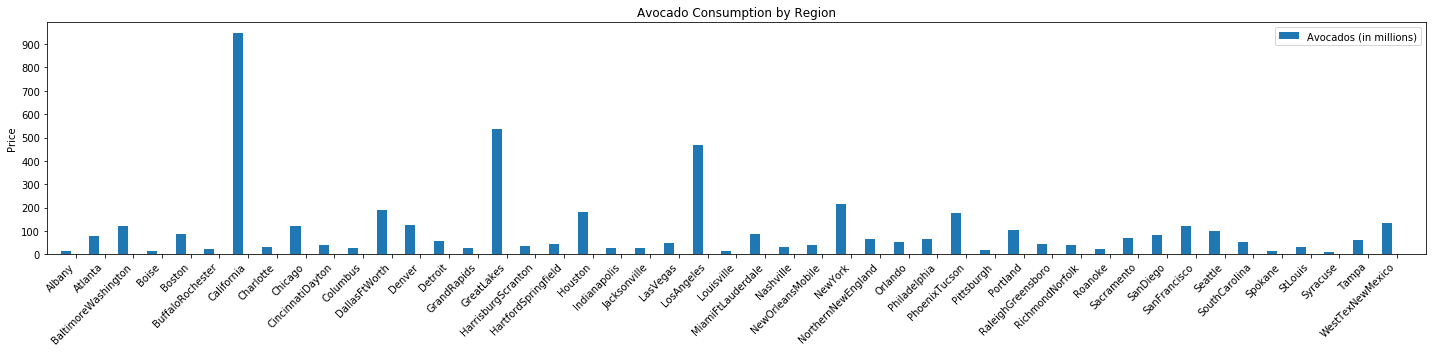

In [58]:
labels = avocado_summary
labels_name = avocado_summary['region']

min_price = labels['Minimum Price']

max_price = labels['Maximum Price']

x = np.arange(len(labels_name))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(x - width, regional_consumption, width, label='Avocados (in millions)')

ax.set_ylabel('Price')
ax.set_title('Avocado Consumption by Region')
ax.set_xticks(x)
ax.set_yticks(np.arange(0, 1000, step = 100))
ax.set_xticklabels(labels_name, rotation = 45, ha="right")
ax.legend()
plt.xlim(-1.0,len(x))
ax.tick_params(which='minor', width=1.00)

fig.tight_layout()

plt.savefig("Resources/screenshots/ConsumptionbyRegion.png")

plt.show()

In [ ]:
labels_name = avocado_summary['region']

min_price = labels['Minimum Price']

max_price = labels['Maximum Price']

x = np.arange(len(labels_name))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(x - width/2, min_price, width, label='Min Price')
rects2 = ax.bar(x + width/2, max_price, width, label='Max Price')

ax.set_ylabel('Price')
ax.set_title('Min/Max Price of Avocaodos 2015-2017')
ax.set_xticks(x)
ax.set_yticks(np.arange(0, max_price.max() + 0.1, step=0.25))
ax.set_xticklabels(labels_name, rotation = 45, ha="right")
ax.legend()
plt.xlim(-1.0,len(x))
ax.tick_params(which='minor', width=1.00)


fig.tight_layout()

plt.savefig("Resources/screenshots/MinMaxPrices.png")

plt.show()

In [7]:
# Grouping Avocado Data by Type of Avocado
type_data = avocado_data.groupby('type')

# Average Price of Avocados by Type
average_price_type = type_data['AveragePrice'].mean()

#Minimum Average Price
min_type_price = type_data['AveragePrice'].min()

#Maximum Average Price
max_type_price = type_data['AveragePrice'].max()

#Price Delta
delta_type_price = max_type_price - min_type_price

#Standard Deviation
std_type_price = type_data['AveragePrice'].sem()

In [8]:
type_df = pd.merge(average_price_type,min_type_price, on='type', how='outer').rename(columns={"AveragePrice_x": "Average Price","AveragePrice_y":"Minimum Price"})
type_df = pd.merge(type_df, max_type_price, on='type', how='outer').rename(columns={"AveragePrice": "Maximum Price"})
type_df = pd.merge(type_df, delta_type_price, on='type', how='outer').rename(columns={"AveragePrice": "Min/Max Delta"})
type_df = pd.merge(type_df, std_type_price, on='type', how='outer').rename(columns={"AveragePrice": "Standard Deviation"})
export_csv = type_df.to_csv('Resources/dfs/Avocado Price by Type.csv')
type_df.reset_index(drop=False)

,type,Average Price,Minimum Price,Maximum Price,Min/Max Delta,Standard Deviation
0,conventional,1.166211,0.46,2.22,1.76,0.003156
1,organic,1.668158,0.44,3.25,2.81,0.004462


In [9]:
# Grouping Avocado Data by Type of Avocado
combo_data = avocado_data.groupby(['region','type'])

In [10]:
# Average Price of Avocados by Type
combo_average_price_type = combo_data['AveragePrice'].mean()

# Minimum Average Price
combo_min_type_price = combo_data['AveragePrice'].min()

#Maximum Average Price
combo_max_type_price = combo_data['AveragePrice'].max()

#Delta
combo_delta_type_price = combo_max_type_price - combo_min_type_price

# Combo Standard Deviation
combo_std_type_price = combo_data['AveragePrice'].sem()

#regional total volume by type of avocado
regional_total_volume = combo_data['Total Volume'].sum()

In [11]:
region_type_df = (pd.merge(combo_average_price_type,combo_min_type_price, on=['region','type'], how='outer').rename(columns={"AveragePrice_x": "Average Price","AveragePrice_y":"Minimum Price"}))
region_type_df = pd.merge(region_type_df, combo_max_type_price, on=['region','type'], how='outer').rename(columns={"AveragePrice": "Maximum Price"})
region_type_df = pd.merge(region_type_df, combo_delta_type_price, on=['region','type'], how='outer').rename(columns={"AveragePrice": "Min/Max Delta"})
region_type_df = pd.merge(region_type_df, combo_std_type_price, on=['region','type'], how='outer').rename(columns={"AveragePrice": "Min/Max Delta"})
region_type_df = pd.merge(region_type_df, regional_total_volume/1000000, on=['region','type'], how='outer').rename(columns={"Total Volume": "Total Volume (in millions)"})
export_csv = region_type_df.to_csv('Resources/dfs/Price by Type by Region.csv')

In [12]:
labels = region_type_df.reset_index(drop=False)
labels_name = labels['region'].unique()

min_price_conventional = labels[labels['type']=='conventional']['Minimum Price']

min_price_organic = labels[labels['type']=='organic']['Minimum Price']

max_price_conventional = labels[labels['type']=='conventional']['Maximum Price']

max_price_organic = labels[labels['type']=='organic']['Maximum Price']

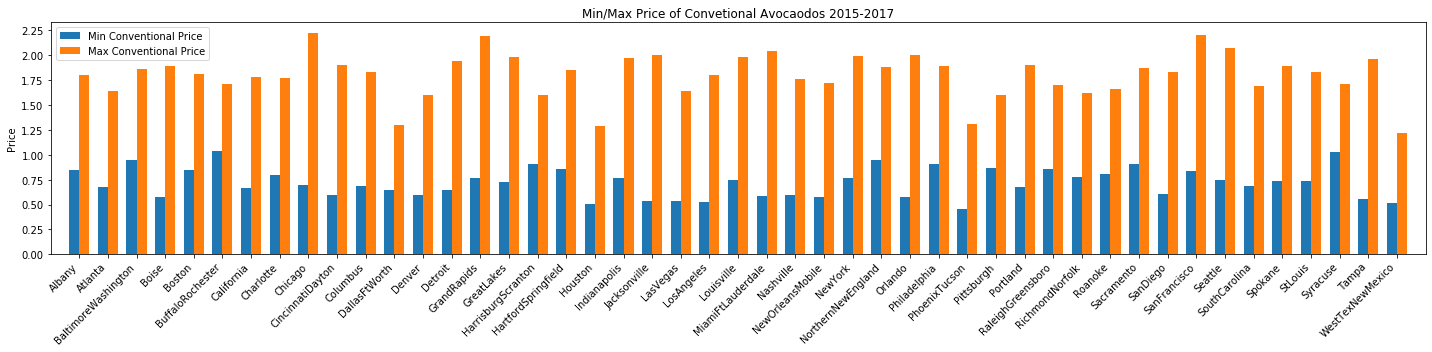

In [13]:
x = np.arange(len(labels_name))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(x - width/2, min_price_conventional, width, label='Min Conventional Price')
rects2 = ax.bar(x + width/2, max_price_conventional, width, label='Max Conventional Price')

ax.set_ylabel('Price')
ax.set_title('Min/Max Price of Convetional Avocaodos 2015-2017')
ax.set_xticks(x)
ax.set_yticks(np.arange(0, max_price_conventional.max() + 0.1, step=0.25))
ax.set_xticklabels(labels_name, rotation = 45, ha="right")
ax.legend()
plt.xlim(-1.0,len(x))
ax.tick_params(which='minor', width=1.00)


fig.tight_layout()

plt.savefig("Resources/screenshots/MinMaxConventionalPrices.png")

plt.show()

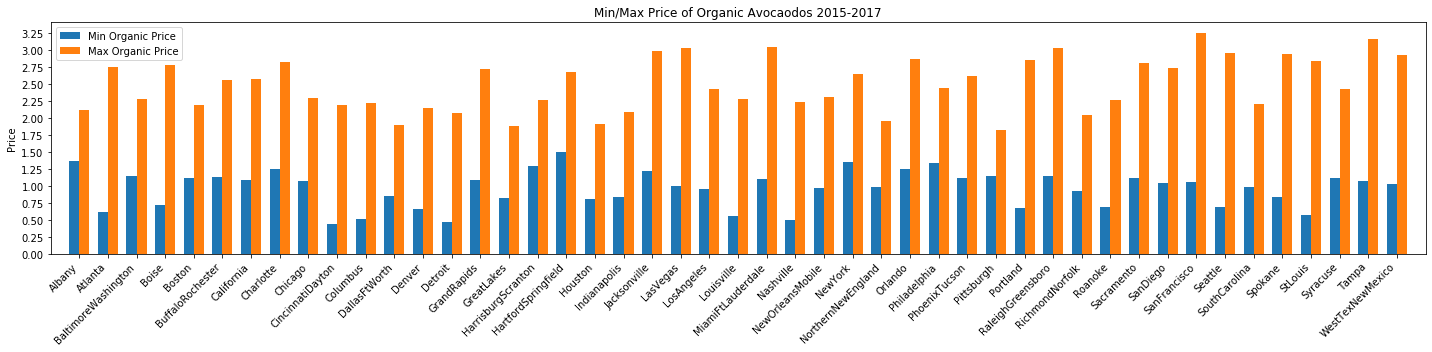

In [14]:
x = np.arange(len(labels_name))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(x - width/2, min_price_organic, width, label='Min Organic Price')
rects2 = ax.bar(x + width/2, max_price_organic, width, label='Max Organic Price')

ax.set_ylabel('Price')
ax.set_title('Min/Max Price of Organic Avocaodos 2015-2017')
ax.set_xticks(x)
ax.set_yticks(np.arange(0, max_price_organic.max() + 0.1, step=0.25))
ax.set_xticklabels(labels_name, rotation = 45, ha="right")
ax.legend()
plt.xlim(-1.0,len(x))
ax.tick_params(which='minor', width=1.00)


fig.tight_layout()

plt.savefig("Resources/screenshots/MinMaxOrganicPrices.png")

plt.show()

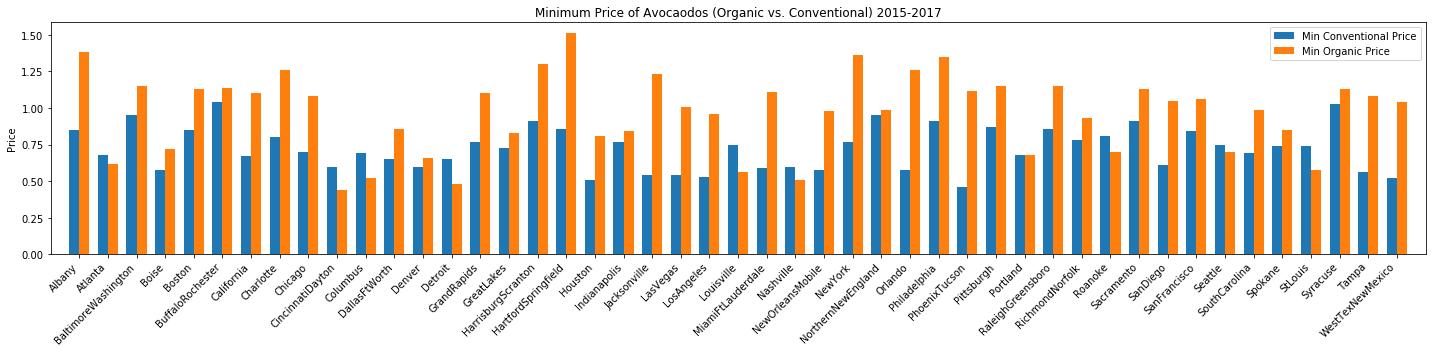

In [15]:
x = np.arange(len(labels_name))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(x - width/2, min_price_conventional, width, label='Min Conventional Price')
rects2 = ax.bar(x + width/2, min_price_organic, width, label='Min Organic Price')

ax.set_ylabel('Price')
ax.set_title('Minimum Price of Avocaodos (Organic vs. Conventional) 2015-2017')
ax.set_xticks(x)
ax.set_yticks(np.arange(0, min_price_organic.max() + 0.1, step=0.25))
ax.set_xticklabels(labels_name, rotation = 45, ha="right")
ax.legend()
plt.xlim(-1.0,len(x))
ax.tick_params(which='minor', width=1.00)


fig.tight_layout()

plt.savefig("Resources/screenshots/MinPricesComparison.png")

plt.show()

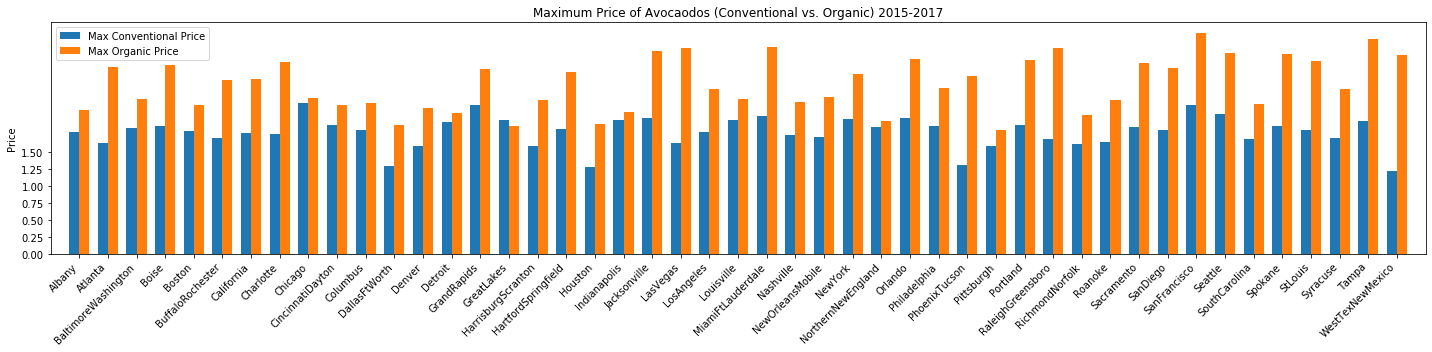

In [16]:
x = np.arange(len(labels_name))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(x - width/2, max_price_conventional, width, label='Max Conventional Price')
rects2 = ax.bar(x + width/2, max_price_organic, width, label='Max Organic Price')

ax.set_ylabel('Price')
ax.set_title('Maximum Price of Avocaodos (Conventional vs. Organic) 2015-2017')
ax.set_xticks(x)
ax.set_yticks(np.arange(0, min_price_organic.max() + 0.1, step=0.25))
ax.set_xticklabels(labels_name, rotation = 45, ha="right")
ax.legend()
plt.xlim(-1.0,len(x))
ax.tick_params(which='minor', width=1.00)


fig.tight_layout()

plt.savefig("Resources/screenshots/MaxPricesComparison.png")

plt.show()

In [17]:
# Sort avocado data by region
region_data2015 = avocado_data2015.groupby('region')

# Average price of avocados by region
regional_mean2015 = region_data2015['AveragePrice'].mean()

# Avocado min by region
regional_min2015 = region_data2015['AveragePrice'].min()

# Avocado max by region
regional_max2015 = region_data2015['AveragePrice'].max()

# Total difference in min/max by region
difference2015 = regional_max2015 - regional_min2015

# Standard deviation of Avocado Prices by Region
regional_std2015 = region_data2015['AveragePrice'].sem()

In [18]:
avocado_summary2015 = pd.merge(regional_mean2015,regional_min2015, on='region',how='outer').rename(columns={"AveragePrice_x": "Average Price","AveragePrice_y":"Minimum Price"})
avocado_summary2015 = pd.merge(avocado_summary2015,regional_max2015, on='region',how='outer').rename(columns={"AveragePrice": "Maximum Price"})
avocado_summary2015 = pd.merge(avocado_summary2015,difference2015, on='region',how='outer').rename(columns={"AveragePrice": "Min/Max Delta"})
avocado_summary2015 = pd.merge(avocado_summary2015,regional_std2015, on='region',how='outer').rename(columns={"AveragePrice": "Standard Deviation"})
avocado_summary2015 = avocado_summary2015.style.format({'Average Price':'${:,.2f}',
                             'Minimum Price':'${:,.2f}',
                             'Maximum Price':'${:,.2f}',
                            'Min/Max Delta':'${:,.2f}'})

In [19]:
# Sort avocado data by region
region_data2016 = avocado_data2016.groupby('region')

# Average price of avocados by region
regional_mean2016 = region_data2016['AveragePrice'].mean()

# Avocado min by region
regional_min2016 = region_data2016['AveragePrice'].min()

# Avocado max by region
regional_max2016 = region_data2016['AveragePrice'].max()

# Total difference in min/max by region
difference2016 = regional_max2016 - regional_min2016

# Standard deviation of Avocado Prices by Region
regional_std2016 = region_data2016['AveragePrice'].sem()

In [20]:
avocado_summary2016 = pd.merge(regional_mean2016,regional_min2016, on='region',how='outer').rename(columns={"AveragePrice_x": "Average Price","AveragePrice_y":"Minimum Price"})
avocado_summary2016 = pd.merge(avocado_summary2016,regional_max2016, on='region',how='outer').rename(columns={"AveragePrice": "Maximum Price"})
avocado_summary2016 = pd.merge(avocado_summary2016,difference2016, on='region',how='outer').rename(columns={"AveragePrice": "Min/Max Delta"})
avocado_summary2016 = pd.merge(avocado_summary2016,regional_std2016, on='region',how='outer').rename(columns={"AveragePrice": "Standard Deviation"})
avocado_summary2016 = avocado_summary2016.style.format({'Average Price':'${:,.2f}',
                             'Minimum Price':'${:,.2f}',
                             'Maximum Price':'${:,.2f}',
                            'Min/Max Delta':'${:,.2f}'})
avocado_summary2016

,Average Price,Minimum Price,Maximum Price,Min/Max Delta,Standard Deviation
region,,,,,
Albany,$1.53,$0.85,$2.00,$1.15,0.0247661
Atlanta,$1.21,$0.68,$2.29,$1.61,0.0346482
BaltimoreWashington,$1.59,$0.95,$2.28,$1.33,0.0318816
Boise,$1.14,$0.58,$2.24,$1.66,0.0371243
Boston,$1.43,$0.85,$2.00,$1.15,0.0262205
BuffaloRochester,$1.48,$1.04,$2.13,$1.09,0.0221604
Charlotte,$1.50,$0.80,$2.03,$1.23,0.0287403
Chicago,$1.55,$0.82,$2.30,$1.48,0.0382584
CincinnatiDayton,$1.09,$0.64,$1.73,$1.09,0.0220784


In [21]:
# Sort avocado data by region
region_data2017 = avocado_data2017.groupby('region')

# Average price of avocados by region
regional_mean2017 = region_data2017['AveragePrice'].mean()

# Avocado min by region
regional_min2017 = region_data2017['AveragePrice'].min()

# Avocado max by region
regional_max2017 = region_data2017['AveragePrice'].max()

# Total difference in min/max by region
difference2017 = regional_max2017 - regional_min2017

# Standard deviation of Avocado Prices by Region
regional_std2017 = region_data2017['AveragePrice'].sem()

In [22]:
avocado_summary2017 = pd.merge(regional_mean2017,regional_min2017, on='region',how='outer').rename(columns={"AveragePrice_x": "Average Price","AveragePrice_y":"Minimum Price"})
avocado_summary2017 = pd.merge(avocado_summary2017,regional_max2017, on='region',how='outer').rename(columns={"AveragePrice": "Maximum Price"})
avocado_summary2017 = pd.merge(avocado_summary2017,difference2017, on='region',how='outer').rename(columns={"AveragePrice": "Min/Max Delta"})
avocado_summary2017 = pd.merge(avocado_summary2017,regional_std2017, on='region',how='outer').rename(columns={"AveragePrice": "Standard Deviation"})
avocado_summary2017 = avocado_summary2017.style.format({'Average Price':'${:,.2f}',
                             'Minimum Price':'${:,.2f}',
                             'Maximum Price':'${:,.2f}',
                            'Min/Max Delta':'${:,.2f}'})

In [23]:
# Grouping Avocado Data by Type of Avocado
combo_data2015 = avocado_data2015.groupby(['region','type'])

# Average Price of Avocados by Type
combo_average_price_type2015 = combo_data2015['AveragePrice'].mean()

# Minimum Average Price
combo_min_type_price2015 = combo_data2015['AveragePrice'].min()

#Maximum Average Price
combo_max_type_price2015 = combo_data2015['AveragePrice'].max()

#Delta
combo_delta_type_price2015 = combo_max_type_price2015 - combo_min_type_price2015

# Combo Standard Deviation
combo_std_type_price2015 = combo_data2015['AveragePrice'].sem()

#regional total volume by type of avocado
regional_total_volume2015 = combo_data2015['Total Volume'].sum()

In [24]:
regional_type_df2015 = (pd.merge(combo_average_price_type2015,combo_min_type_price2015, on=['region','type'], how='outer').rename(columns={"AveragePrice_x": "Average Price","AveragePrice_y":"Minimum Price"}))
regional_type_df2015 = pd.merge(regional_type_df2015, combo_max_type_price2015, on=['region','type'], how='outer').rename(columns={"AveragePrice": "Maximum Price"})
regional_type_df2015 = pd.merge(regional_type_df2015, combo_delta_type_price2015, on=['region','type'], how='outer').rename(columns={"AveragePrice": "Min/Max Delta"})
regional_type_df2015 = pd.merge(regional_type_df2015, combo_std_type_price2015, on=['region','type'], how='outer').rename(columns={"AveragePrice": "Min/Max Delta"})
regional_type_df2015 = pd.merge(regional_type_df2015, regional_total_volume2015/1000000, on=['region','type'], how='outer').rename(columns={"Total Volume": "Total Volume (in millions)"})

In [25]:
# Grouping Avocado Data by Type of Avocado
combo_data2016 = avocado_data2016.groupby(['region','type'])

# Average Price of Avocados by Type
combo_average_price_type2016 = combo_data2016['AveragePrice'].mean()

# Minimum Average Price
combo_min_type_price2016 = combo_data2016['AveragePrice'].min()

#Maximum Average Price
combo_max_type_price2016 = combo_data2016['AveragePrice'].max()

#Delta
combo_delta_type_price2016 = combo_max_type_price2016 - combo_min_type_price2016

# Combo Standard Deviation
combo_std_type_price2016 = combo_data2016['AveragePrice'].sem()

#regional total volume by type of avocado
regional_total_volume2016 = combo_data2016['Total Volume'].sum()


In [26]:
regional_type_df2016 = (pd.merge(combo_average_price_type2016,combo_min_type_price2016, on=['region','type'], how='outer').rename(columns={"AveragePrice_x": "Average Price","AveragePrice_y":"Minimum Price"}))
regional_type_df2016 = pd.merge(regional_type_df2016, combo_max_type_price2016, on=['region','type'], how='outer').rename(columns={"AveragePrice": "Maximum Price"})
regional_type_df2016 = pd.merge(regional_type_df2016, combo_delta_type_price2016, on=['region','type'], how='outer').rename(columns={"AveragePrice": "Min/Max Delta"})
regional_type_df2016 = pd.merge(regional_type_df2016, combo_std_type_price2016, on=['region','type'], how='outer').rename(columns={"AveragePrice": "Min/Max Delta"})
regional_type_df2016 = pd.merge(regional_type_df2016, regional_total_volume2016/1000000, on=['region','type'], how='outer').rename(columns={"Total Volume": "Total Volume (in millions)"})

In [27]:
# Grouping Avocado Data by Type of Avocado
combo_data2017 = avocado_data2017.groupby(['region','type'])

# Average Price of Avocados by Type
combo_average_price_type2017 = combo_data2017['AveragePrice'].mean()

# Minimum Average Price
combo_min_type_price2017 = combo_data2017['AveragePrice'].min()

#Maximum Average Price
combo_max_type_price2017 = combo_data2017['AveragePrice'].max()

#Delta
combo_delta_type_price2017 = combo_max_type_price2017 - combo_min_type_price2017

# Combo Standard Deviation
combo_std_type_price2017 = combo_data2017['AveragePrice'].sem()

#regional total volume by type of avocado
regional_total_volume2017 = combo_data2017['Total Volume'].sum()


In [28]:
regional_type_df2017 = (pd.merge(combo_average_price_type2017,combo_min_type_price2017, on=['region','type'], how='outer').rename(columns={"AveragePrice_x": "Average Price","AveragePrice_y":"Minimum Price"}))
regional_type_df2017 = pd.merge(regional_type_df2017, combo_max_type_price2017, on=['region','type'], how='outer').rename(columns={"AveragePrice": "Maximum Price"})
regional_type_df2017 = pd.merge(regional_type_df2017, combo_delta_type_price2017, on=['region','type'], how='outer').rename(columns={"AveragePrice": "Min/Max Delta"})
regional_type_df2017 = pd.merge(regional_type_df2017, combo_std_type_price2017, on=['region','type'], how='outer').rename(columns={"AveragePrice": "Min/Max Delta"})
regional_type_df2017 = pd.merge(regional_type_df2017, regional_total_volume2017/1000000, on=['region','type'], how='outer').rename(columns={"Total Volume": "Total Volume (in millions)"})

total_consumption_by_year_df = pd.merge(regional_total_volume2015,regional_total_volume2016, on=['region','type'], how='outer')
total_consumption_by_year_df = pd.merge(total_consumption_by_year_df,regional_total_volume2017, on=['region','type'], how='outer').rename(columns={'Total Volume_x':'2015 Volume (in millions)','Total Volume_y':'2016 Volume (in millions)','Total Volume':'2017 Volume (in millions)'})
total_consumption_by_year_df

2015 Volume (in millions)  \
region              type                                      
Albany              conventional               3.962854e+06   
                    organic                    6.704225e+04   
Atlanta             conventional               2.289802e+07   
                    organic                    3.336830e+05   
BaltimoreWashington conventional               3.994336e+07   
                    organic                    7.022221e+05   
Boise               conventional               3.686059e+06   
                    organic                    9.829819e+04   
Boston              conventional               2.723659e+07   
                    organic                    2.183998e+05   
BuffaloRochester    conventional               5.742222e+06   
                    organic                    1.510128e+05   
Charlotte           conventional               9.290932e+06   
                    organic                    1.964117e+05   
Chicago             conventional               4.032161e+07   
                    organic                    1.173108e+06   
CincinnatiDayton    conventional               1.111233e+07   
                    organic                    6.438504e+05   
Columbus            conventional               7.585219e+06   
                    organic                    2.645629e+05   
DallasFtWorth       conventional               5.970061e+07   
                    organic                    6.106959e+05   
Denver              conventional               3.730426e+07   
                    organic                    1.886084e+06   
Detroit             conventional               1.753496e+07   
                    organic                    4.446168e+05   
GrandRapids         conventional               9.658056e+06   
                    organic                    8.288668e+04   
GreatLakes          conventional               1.652763e+08   
                    organic                    4.111662e+06   
...                                                     ...   
PhoenixTucson       conventional               5.661233e+07   
                    organic                    5.639563e+05   
Pittsburgh          conventional               4.449085e+06   
                    organic                    9.091458e+04   
Portland            conventional               2.622191e+07   
                    organic                    1.721550e+06   
RaleighGreensboro   conventional               1.250400e+07   
                    organic                    3.133357e+05   
RichmondNorfolk     conventional               1.135446e+07   
                    organic                    2.966187e+05   
Roanoke             conventional               6.371645e+06   
                    organic                    4.071672e+05   
Sacramento          conventional               2.147650e+07   
                    organic                    5.040405e+05   
SanDiego            conventional               2.601433e+07   
                    organic                    5.713916e+05   
SanFrancisco        conventional               3.827002e+07   
                    organic                    1.175777e+06   
Seattle             conventional               2.719173e+07   
                    organic                    1.865368e+06   
Spokane             conventional               4.006952e+06   
                    organic                    1.747355e+05   
StLouis             conventional               9.696863e+06   
                    organic                    2.057125e+05   
Syracuse            conventional               2.662173e+06   
                    organic                    7.216006e+04   
Tampa               conventional               1.703063e+07   
                    organic                    1.009712e+05   
SouthCarolina       conventional                        NaN   
                    organic                             NaN   

                                  2016 Volume (in millions)  \
r

In [34]:
byType_2015 = avocado_data2015.groupby('type')
byType_2016 = avocado_data2016.groupby('type')
byType_2017 = avocado_data2017.groupby('type')

avg_2015 = byType_2015['AveragePrice'].mean()
avg_2016 = byType_2016['AveragePrice'].mean()
avg_2017 = byType_2017['AveragePrice'].mean()
total_avo_2015 = byType_2015['Total Volume'].sum()/10000000
total_avo_2016 = byType_2016['Total Volume'].sum()/10000000
total_avo_2017 = byType_2017['Total Volume'].sum()/10000000

avg_df = (pd.merge(avg_2015,avg_2016,on='type',how='outer').rename(columns={"AveragePrice_x": "2015","AveragePrice_y":"2016"}))
avg_df = (pd.merge(avg_df,avg_2017,on='type',how='outer').rename(columns={"AveragePrice": "2017", "type":"Year"}))
avg_df.reset_index(drop=True).rename(columns={"type":"Year"})
avg_df1 = avg_df.T


total_avo_volume = (pd.merge(total_avo_2015,total_avo_2016, on='type',how='outer').rename(columns={"Total Volume_x": "2015","Total Volume_y":"2016"}))
total_avo_volume = (pd.merge(total_avo_volume,total_avo_2017, on='type',how='outer').rename(columns={"Total Volume": "2017"}))

total_avo_volume = total_avo_volume.T
export_csv = total_avo_volume.to_csv('Resources/dfs/Convetional vs Organic Consumption.csv')
total_avo_volume

type,conventional,organic
2015,1.092998,1.675000
2016,1.115648,1.578770
2017,1.309099,1.745137


type,conventional,organic
2015,1.092998,1.675000
2016,1.115648,1.578770
2017,1.309099,1.745137


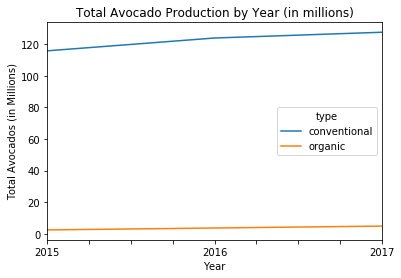

In [30]:
#in millions
consumption_growth = (total_avo_2017 - total_avo_2015) / total_avo_2017
consumption_growth


ax1 = total_avo_volume.plot()
ax1.set_ylabel('Total Avocados (in Millions)')
ax1.set_xlabel('Year')
ax1.set_title('Total Avocado Production by Year (in millions)')
ax1.get_figure().savefig('Resources/screenshots/TotalAvocadoProductionByYear.png')
consumption_growth
avg_df1


In [31]:
avg_df1

type,conventional,organic
2015,1.092998,1.675000
2016,1.115648,1.578770
2017,1.309099,1.745137


type
conventional    19.771416
organic          4.187297
Name: AveragePrice, dtype: float64

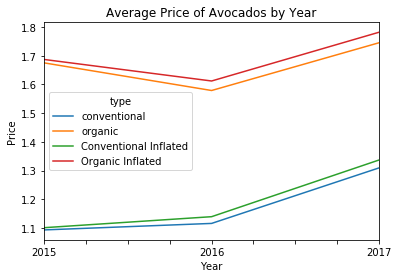

In [40]:
avg_delta = (avg_2017 - avg_2015)/avg_2015
avg_delta = avg_delta*100
#inflation rates courtesy of https://www.usinflationcalculator.com/inflation/current-inflation-rates/
#2015: 0.7%
avg_df1['Conventional Inflated'] = avg_df1['conventional'][0]*1.0071
avg_df1['Organic Inflated'] = avg_df1['organic'][0]*1.0071
#2016 2.1%
avg_df1['Conventional Inflated'][1] = avg_df1['conventional'][1]*1.021
avg_df1['Organic Inflated'][1] = avg_df1['organic'][1]*1.021
#2017 2.1%
avg_df1['Conventional Inflated'][2] = avg_df1['conventional'][2]*1.021
avg_df1['Organic Inflated'][2] = avg_df1['organic'][2]*1.021


ax2 = avg_df1.plot()
ax2.set_ylabel('Price')
ax2.set_xlabel('Year')
ax2.set_title('Average Price of Avocados by Year')
ax2.get_figure().savefig('Resources/screenshots/InflationRatesVsPriceByYearOverall.png')
avg_delta

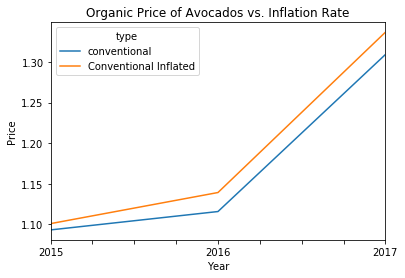

In [47]:
avg_df2 = avg_df1
avg_df2 = avg_df2.drop('organic',1)
avg_df2 = avg_df2.drop('Organic Inflated',1)
avg_df2

ax3 = avg_df2.plot()
ax3.set_ylabel('Price')
ax3.set_xlabel('Year')
ax3.set_title('Organic Price of Avocados vs. Inflation Rate')
ax3.get_figure().savefig('Resources/screenshots/OrganicPriceVsInflation.png')
export_csv = avg_df2.to_csv('Resources/dfs/ConventionalInflation.csv')

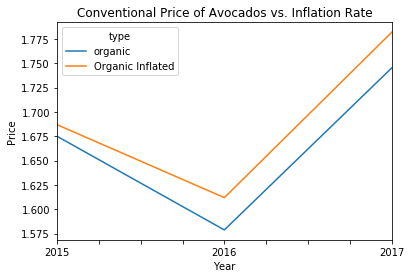

In [48]:
avg_df3 = avg_df1
avg_df3 = avg_df3.drop('conventional',1)
avg_df3 = avg_df3.drop('Conventional Inflated',1)
avg_df3

ax3 = avg_df3.plot()
ax3.set_ylabel('Price')
ax3.set_xlabel('Year')
ax3.set_title('Conventional Price of Avocados vs. Inflation Rate')
ax3.get_figure().savefig('Resources/screenshots/ConventionalPriceVsInflation.png')
export_csv = avg_df3.to_csv('Resources/dfs/OrganicInflation.csv')